Primeras filas del dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

None


Columnas disponibles en el dataset: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Valores nulos por columna:
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Número de filas duplicadas: 0


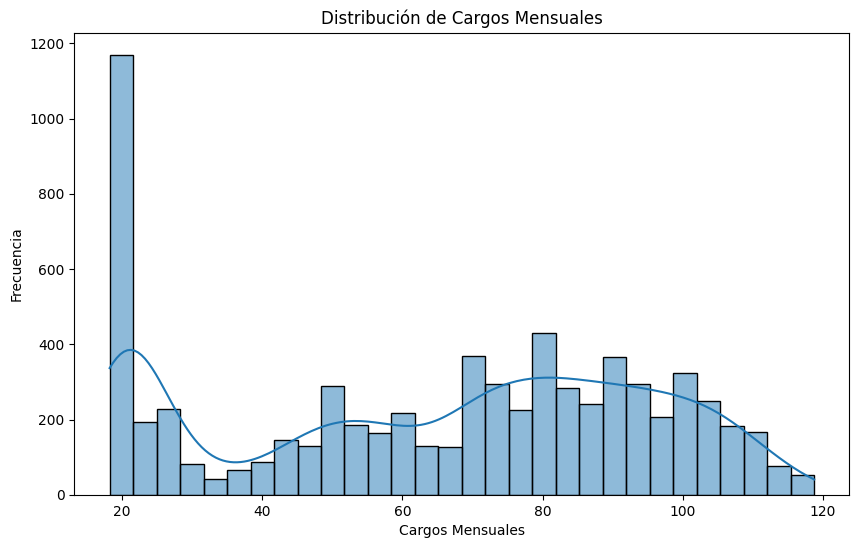

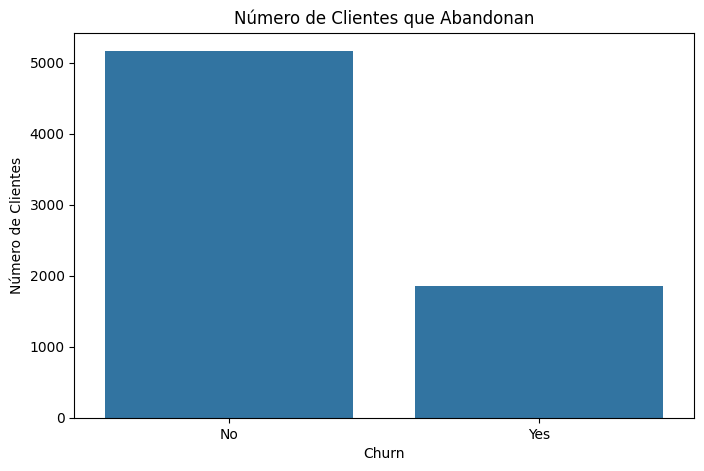

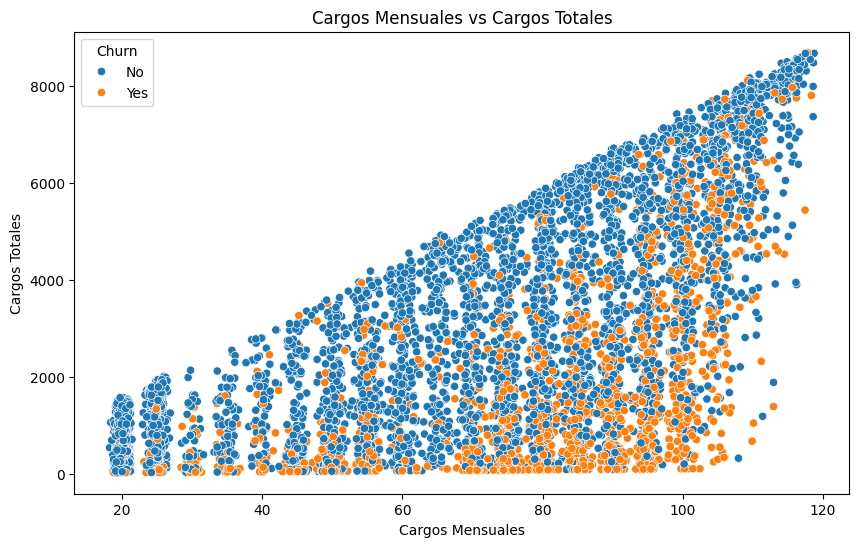

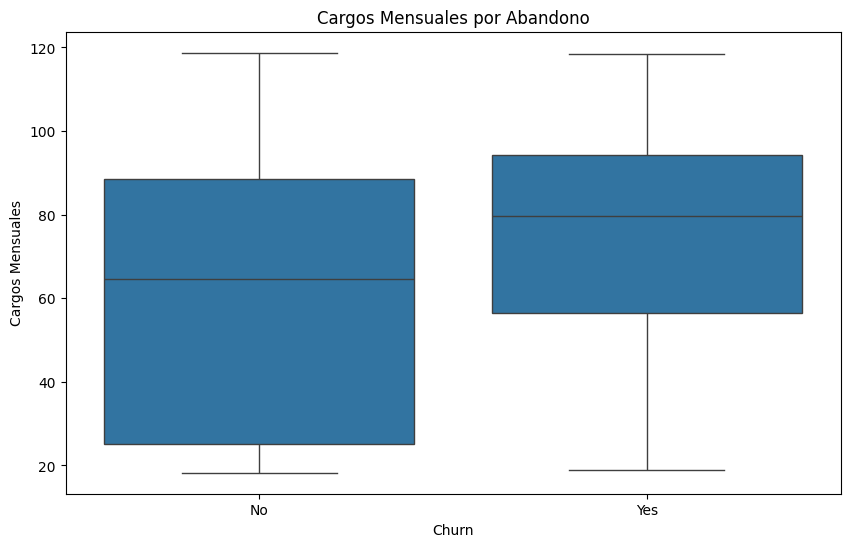

Máximo en MonthlyCharges: 118.75
Máximo en TotalCharges: 8684.8
Registro(s) con valores máximos:
       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
4586  Female              0     Yes        Yes      72          Yes   
4610    Male              0     Yes         No      72          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
4586           Yes     Fiber optic            Yes          Yes   
4610           Yes     Fiber optic            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
4586              Yes         Yes         Yes             Yes  Two year   
4610              Yes         Yes         Yes             Yes  One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
4586              Yes  Bank transfer (automatic)          118.75   
4610              Yes  Bank transfer (automatic)          117.80   

      TotalCharges Churn  
4586       8672.45    No  
4610

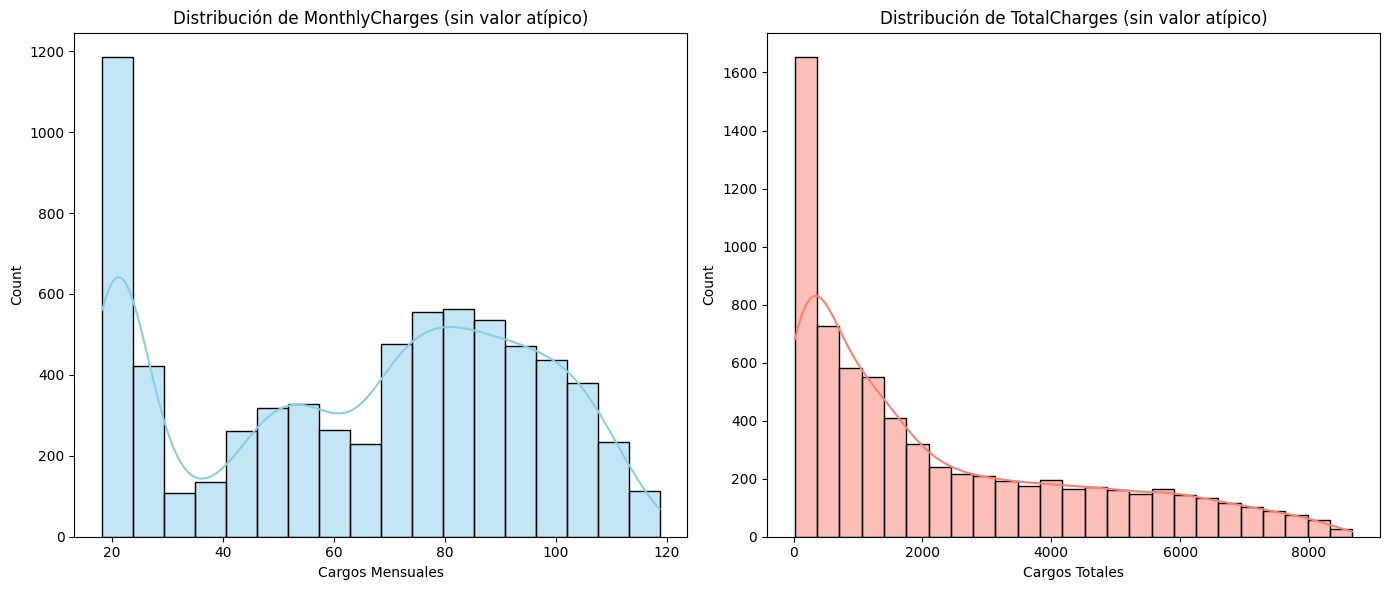

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7019.000000  7019.000000     7019.000000   7019.000000
mean        0.162559    32.458185       64.836672   2287.133812
std         0.368989    24.529382       30.059755   2263.072274
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.725000    410.525000
50%         0.000000    29.000000       70.400000   1400.300000
75%         0.000000    55.000000       89.900000   3798.375000
max         1.000000    72.000000      118.650000   8670.100000


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

# Inspeccionar el dataset
print("Primeras filas del dataset:")
display(data.head())  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

print("\nInformación general del dataset:")
display(data.info())  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

print("\nColumnas disponibles en el dataset:", data.columns)

# Eliminar la columna 'customerID' por no ser relevante en el análisis de tendencias
data.drop(columns=['customerID'], inplace=True)  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

# Convertir 'TotalCharges' a numérico, forzando errores a NaN para manejar valores no válidos
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

# Revisar y mostrar valores nulos en cada columna
print("\nValores nulos por columna:")
print(data.isnull().sum())  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html

# Manejo de valores nulos
# Reemplazar valores nulos en 'PaymentMethod' con un marcador 'unknown'
data['PaymentMethod'] = data['PaymentMethod'].fillna('unknown')  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
# Rellenar valores nulos en 'TotalCharges' con la mediana
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html

# Eliminar filas con valores nulos restantes
data.dropna(inplace=True)  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

# Eliminar filas duplicadas y mostrar el número de duplicados eliminados
data.drop_duplicates(inplace=True)  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
print(f"Número de filas duplicadas: {data.duplicated().sum()}")  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

# Identificar y tratar valores atípicos en MonthlyCharges
# Cálculo de IQR para 'MonthlyCharges'
Q1 = data['MonthlyCharges'].quantile(0.25)  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html
Q3 = data['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers en 'MonthlyCharges'
data = data[(data['MonthlyCharges'] >= lower_bound) & (data['MonthlyCharges'] <= upper_bound)]  # https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

# Histograma de MonthlyCharges
plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyCharges'], bins=30, kde=True)  # https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.title('Distribución de Cargos Mensuales')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=data)  # https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.title('Número de Clientes que Abandonan')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

# Gráfico de dispersión entre MonthlyCharges y TotalCharges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=data)  # https://seaborn.pydata.org/generated/seaborn.scatterplot.html
plt.title('Cargos Mensuales vs Cargos Totales')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Cargos Totales')
plt.show()

# Gráfico de cajas de MonthlyCharges por Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)  # https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.title('Cargos Mensuales por Abandono')
plt.xlabel('Churn')
plt.ylabel('Cargos Mensuales')
plt.show()

# Identificar el valor máximo en cada columna para inspección
max_monthly = data['MonthlyCharges'].max()  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html
max_total = data['TotalCharges'].max()

print("Máximo en MonthlyCharges:", max_monthly)
print("Máximo en TotalCharges:", max_total)

# Filtrar los registros que coinciden con estos valores máximos para ver más detalles
outliers = data[(data['MonthlyCharges'] == max_monthly) | (data['TotalCharges'] == max_total)]
print("Registro(s) con valores máximos:\n", outliers)

# Eliminar el valor atípico
data_cleaned = data.drop(outliers.index)  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

# Visualizar nuevamente después de tratar el valor atípico
plt.figure(figsize=(14, 6))

# Histograma de 'MonthlyCharges'
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['MonthlyCharges'], kde=True, color='skyblue')  # https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.title('Distribución de MonthlyCharges (sin valor atípico)')
plt.xlabel('Cargos Mensuales')

# Histograma de 'TotalCharges'
plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['TotalCharges'], kde=True, color='salmon')
plt.title('Distribución de TotalCharges (sin valor atípico)')
plt.xlabel('Cargos Totales')

plt.tight_layout()
plt.show()
print(data_cleaned.describe())  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
